In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

 ## Load the dataset

In [3]:

url='https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin', 'car_name'
]
data=pd.read_csv(url,sep=r'\s+',names=column_names, comment='\t', na_values='?')
# Display basic info
data.head()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None


In [4]:
data.head(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


## Data Exploration

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

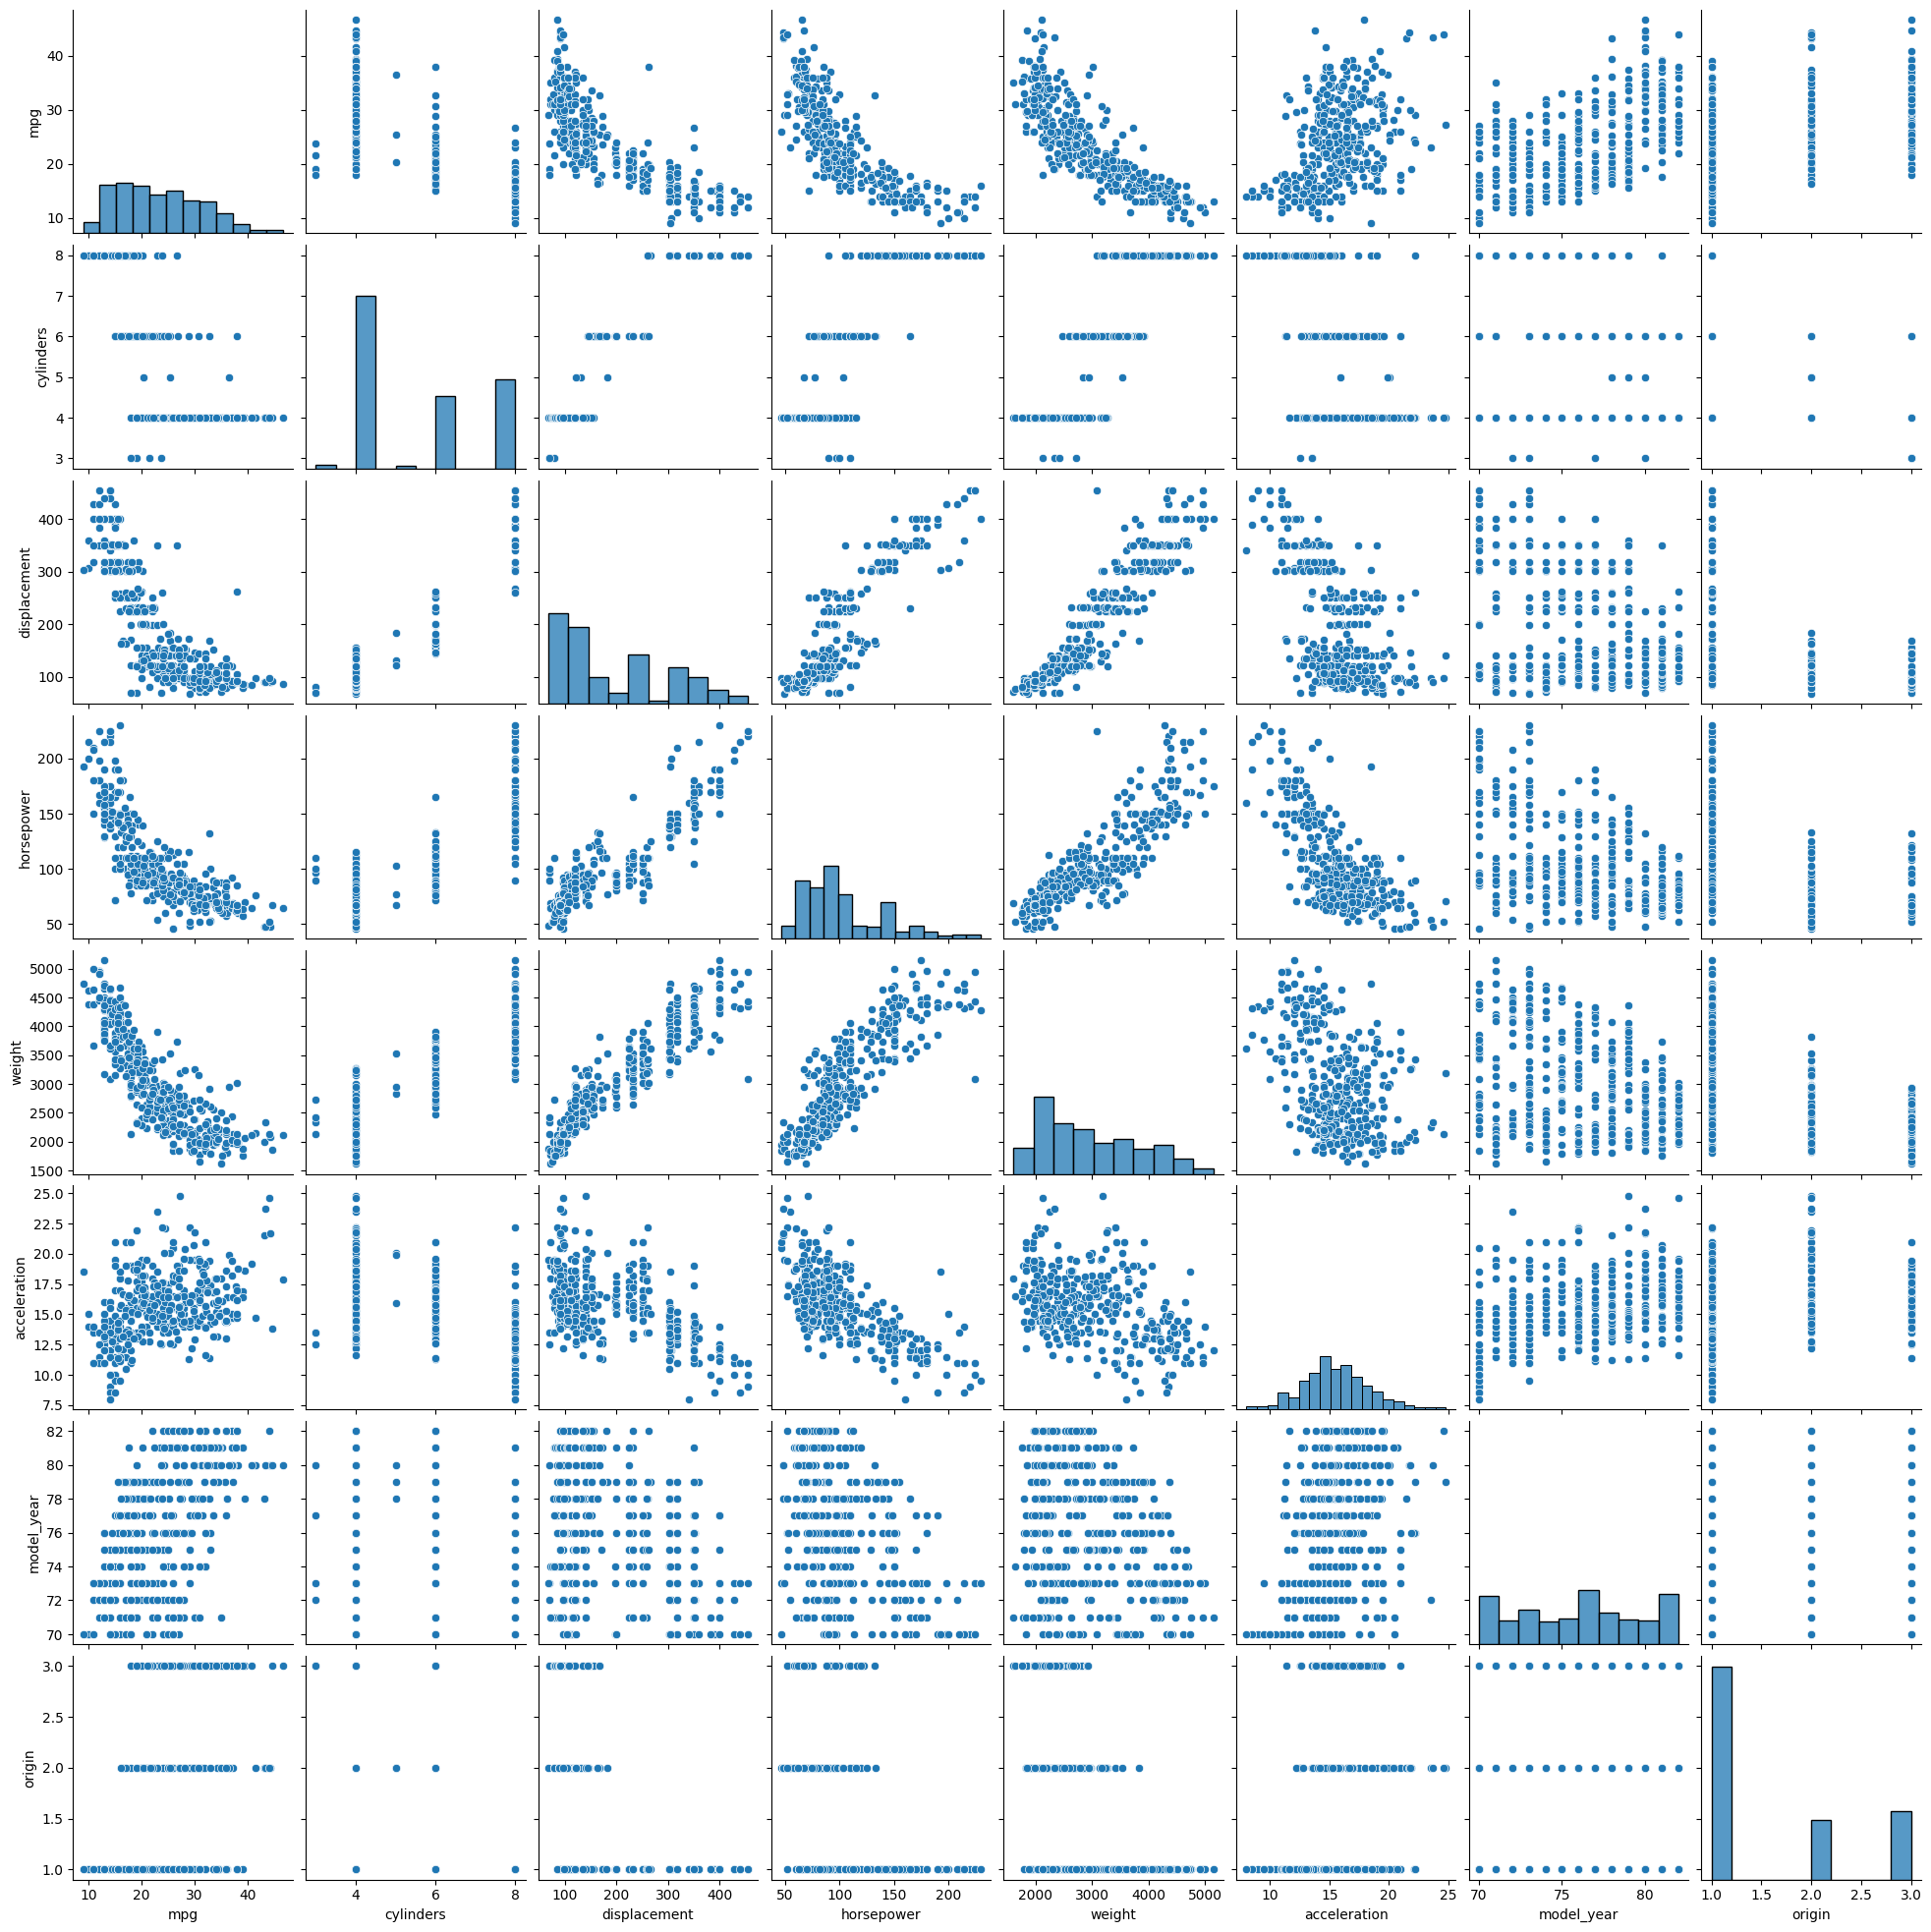

In [4]:
# Check for missing values
print(data.isnull().sum())
# Drop rows with missing values
data=data.dropna()
# Visualize distributions
sns.pairplot(data)
plt.show                                        


## Data Preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Convert 'origin' to one-hot encoding
pd.get_dummies(data,columns=["origin"],drop_first=True)
# Separate features and target
X=data.drop(["mpg","car_name"],axis=1)
Y=data["mpg"]
# Split dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
# Standardize features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


## Regression with Decision Tree

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Train Decision Tree Regressor
reg=DecisionTreeRegressor(random_state=42)
reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_test)
# Evaluation
print("Mean Squared Error:",mean_squared_error(Y_test,Y_pred))
print("R2 Score:",r2_score(Y_test,Y_pred))

Mean Squared Error: 18.35481012658228
R2 Score: 0.6403879234623205


## Classification Task

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
# Create categories for 'mpg'
bins=[0,20,30,50]
labels=['Low','Medium','High']
data["mpg_category"]=pd.cut(data["mpg"],bins=bins,labels=labels)
# Encode mpg_categories column
label_encoder=LabelEncoder()
data['mpg_categories'] = label_encoder.fit_transform(data['mpg_categories'])
# Encode the target labels
label_encoder=LabelEncoder()
Y_class=label_encoder.fit_transform(data["mpg_category"])
# Prepare data for classification
X_class= data.drop(["mpg","mpg_category","car_name"],axis=1)
# Split dataset
X_train_class,X_test_class,Y_train_class,Y_test_class=train_test_split(X_class,Y_class,test_size=0.2,random_state=42)
# Train Decision Tree Classifier
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train_class,Y_train_class)
# Predictions
Y_pred_class=clf.predict(X_test_class)
# Evaluation
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test_class,Y_pred_class))
print(classification_report(Y_test_class,Y_pred_class))


[[10  0  0]
 [ 0 32  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        37

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



## Visualize the Decision Tree

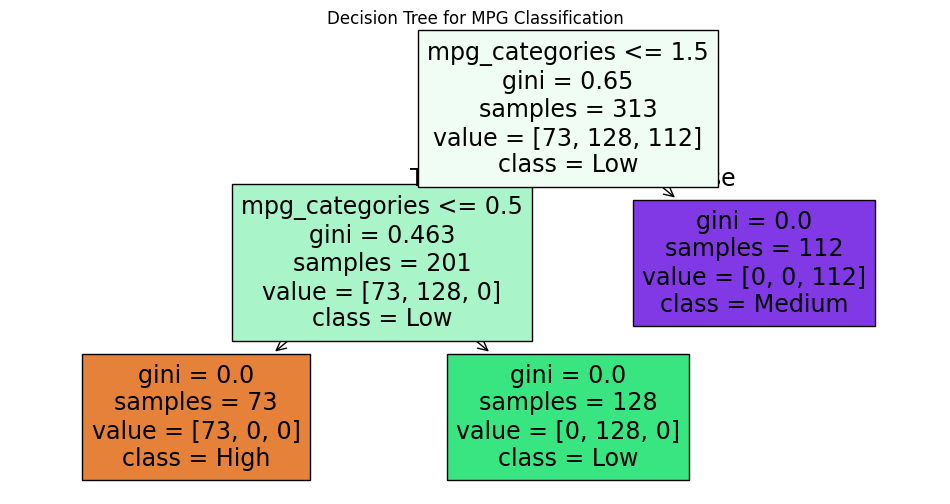

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(clf,feature_names=X_class.columns,class_names=label_encoder.classes_,filled=True)
plt.title("Decision Tree for MPG Classification")
plt.show()